In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns

In [3]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples=30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

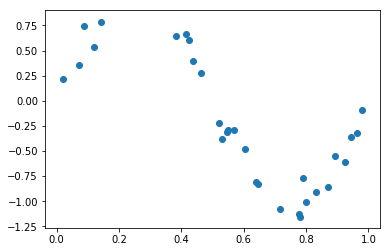

In [5]:
X,y = make_nonlinear()
plt.scatter(X,y)
plt.show()

In [6]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [8]:
print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Sun, 08 Jul 2018   Prob (F-statistic):           1.69e-06
Time:                        17:17:50   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

In [9]:
print(sm.OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     18.38
Date:                Sun, 08 Jul 2018   Prob (F-statistic):           9.14e-06
Time:                        17:18:05   Log-Likelihood:                -14.953
No. Observations:                  30   AIC:                             35.91
Df Residuals:                      27   BIC:                             40.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8638      0.248      3.487      0.0

In [10]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sun, 08 Jul 2018   Prob (F-statistic):           1.06e-17
Time:                        17:18:05   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

### overfitting
- 모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 overfitting이라고 한다.
     - 독립 변수 데이터 갯수에 비해 파라미터의 수가 과도하게 크거나,
     - 독립 변수 데이터가 서로 독립이 아닌 경우(multicollinearity)에 발생한다.

## Regularized
- 정규화 선형회귀 방법은 선형회귀 계수에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상을 막는 것이다.
- Regularized Method, Penalized Method, Constrained Least Squares
    - Ridged regression model
    - Lasso regression model
    - Elastic Net regression model

### Statsmodels' regularized gression model
- `fit_regularized` method
- `0.5 * RSS/N + alpha *(0.5 * (1-L1_wt) sum of w_i^2 + L1_wt sum of abs(w_i))`
- hyper parameter is defined as 'alpha' and 'L1_wt'

In [11]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [12]:
model = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params
# use non-linear model by poloynomial equation but it can make overfitting problem.

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141684
I(x ** 3)     3866.723115
I(x ** 4)   -18340.939667
I(x ** 5)    49326.072553
I(x ** 6)   -78884.743085
I(x ** 7)    74538.645164
I(x ** 8)   -38453.132196
I(x ** 9)     8350.254987
dtype: float64

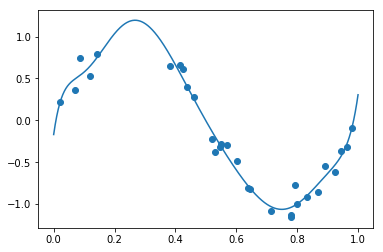

In [13]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()
    
plot_statsmodels(result1)   

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


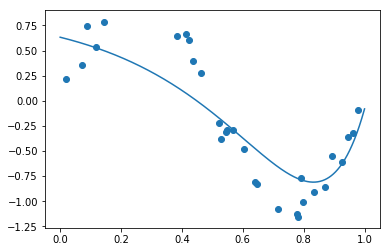

In [15]:
# if L1_wt is 0 then this model becomes 'Ridge'
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2) 

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


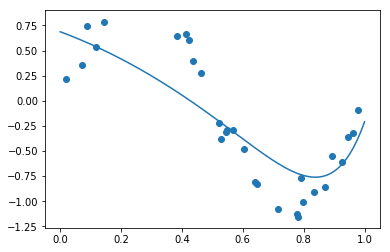

In [17]:
# if L1_wt is 1 then this mdoel becomes 'Lasso'
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)
plot_statsmodels(result3) 

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


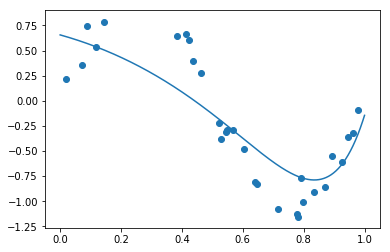

In [19]:
# Elastic Net model
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)
plot_statsmodels(result4) 

### Regularized model in Scikit-learn

In [31]:
def plot_sklearn(model):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025499e+03]


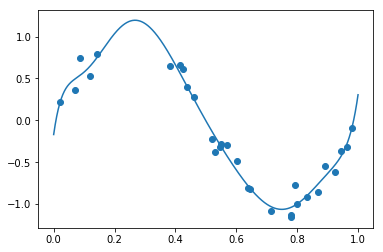

In [21]:
from sklearn.preprocessing import PolynomialFeatures
# make polynomial function 
from sklearn.pipeline import make_pipeline
# This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


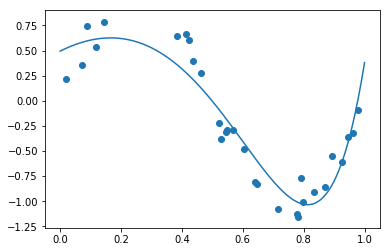

In [22]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


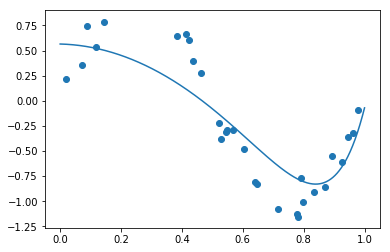

In [23]:
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


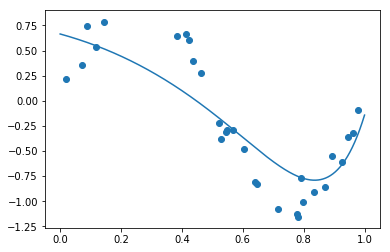

In [24]:
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)


In [26]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [27]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.01,0.1,1.0,10.0
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [28]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.01,0.1,1.0,10.0
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


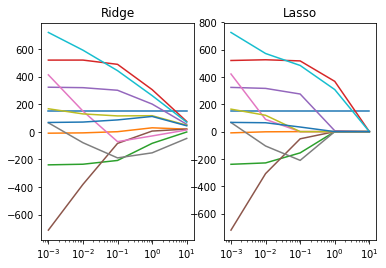

In [30]:
import matplotlib as mpl
mpl.rcParams["font.family"] = 'DejaVu Sans'

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title("Ridge")
ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")
plt.show()